In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skmultilearn.model_selection import iterative_train_test_split
import re
from unidecode import unidecode

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data.shape

(20972, 9)

In [3]:
train_data.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [4]:
train_data.rename(columns={'TITLE':'title', 'ABSTRACT': 'abstract'}, inplace=True)

In [5]:
train_data.head()

,ID,title,abstract,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [6]:
def concatenate_title_abstract(row):
    abstract = row['abstract']
    title = row['title']
    full_text = "Title: " + title + " Abstract: " + abstract
    return full_text
train_data["text"] = train_data.apply(concatenate_title_abstract, axis=1)

In [7]:
train_data.head()

,ID,title,abstract,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Title: Reconstructing Subject-Specific Effect ...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Title: Rotation Invariance Neural Network Abst...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Title: Spherical polyharmonics and Poisson ker...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,Title: A finite element approximation for the ...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Title: Comparative study of Discrete Wavelet T...


In [8]:
categories = ["Computer Science", "Physics", "Mathematics", "Statistics", "Quantitative Biology", "Quantitative Finance"]

In [13]:
def get_num_labels(row):
    labels = row[categories]
    return labels.sum()
    
train_data["num_labels"] = train_data.apply(get_num_labels, axis=1)

In [14]:
train_data["num_labels"].describe()

count    20972.000000
mean         1.252479
std          0.461173
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: num_labels, dtype: float64

In [21]:
num_label_distribution = train_data["num_labels"].value_counts()
num_label_distribution

num_labels
1    15928
2     4793
3      251
Name: count, dtype: int64

In [35]:
category_distribution = train_data[categories].sum()
for index, value in category_distribution.items():
    print(f"{index}: {value}: {(value/len(train_data)) * 100}%")

Computer Science: 8594: 40.978447453747854%
Physics: 6013: 28.671562082777037%
Mathematics: 5618: 26.78809841693687%
Statistics: 5206: 24.823574289528896%
Quantitative Biology: 587: 2.798970055311844%
Quantitative Finance: 249: 1.1872973488460805%


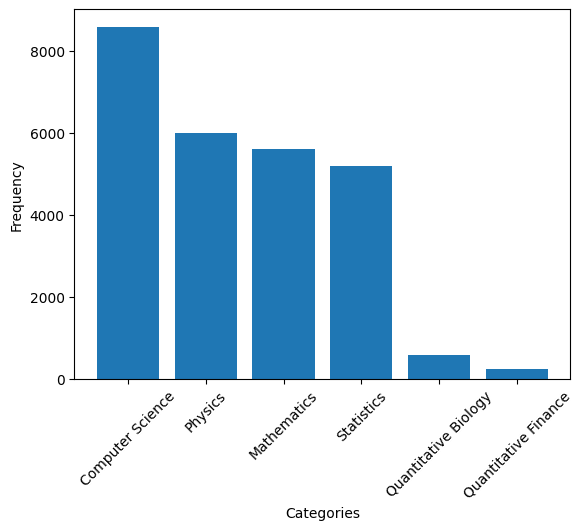

In [38]:
plt.bar(categories, category_distribution)
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.xticks(ticks=categories, rotation=45)
plt.show()

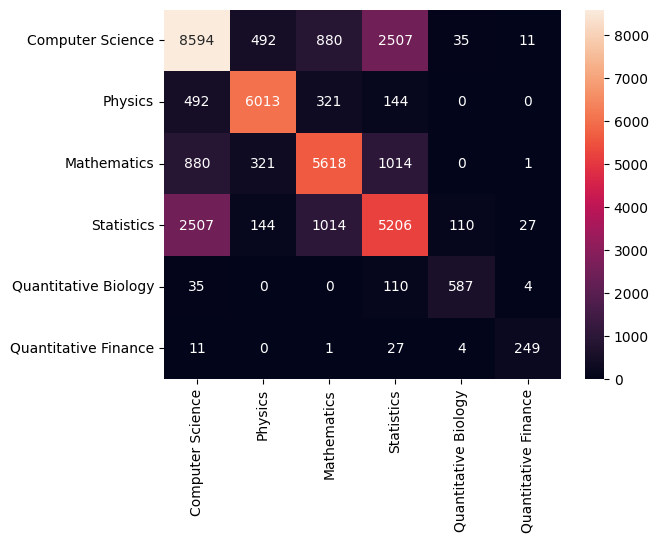

In [54]:
two_label_combinations = train_data[categories].T.dot(train_data[categories])
sns.heatmap(two_label_combinations, annot=True, fmt="d")
plt.show()

In [61]:
multiple_label_combinations = train_data[categories].value_counts()
for combo, count in multiple_label_combinations.items():
    combination_name = ""
    for index,label in enumerate(combo):
        if label == 1:
            combination_name += categories[index] + ", "
    print(f"{combination_name}: {count}")

Physics, : 5120
Computer Science, : 4910
Mathematics, : 3610
Computer Science, Statistics, : 2285
Statistics, : 1636
Mathematics, Statistics, : 825
Computer Science, Mathematics, : 682
Quantitative Biology, : 443
Computer Science, Physics, : 437
Physics, Mathematics, : 293
Quantitative Finance, : 209
Computer Science, Mathematics, Statistics, : 179
Statistics, Quantitative Biology, : 105
Physics, Statistics, : 99
Computer Science, Physics, Statistics, : 36
Computer Science, Quantitative Biology, : 30
Statistics, Quantitative Finance, : 24
Computer Science, Physics, Mathematics, : 19
Physics, Mathematics, Statistics, : 9
Computer Science, Quantitative Finance, : 9
Computer Science, Statistics, Quantitative Biology, : 5
Quantitative Biology, Quantitative Finance, : 4
Computer Science, Statistics, Quantitative Finance, : 2
Mathematics, Statistics, Quantitative Finance, : 1


In [23]:
X = train_data["text"].values.reshape(-1, 1)
y = train_data[categories].values
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.2)

In [24]:
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")

X_train.shape: (16771, 1)
X_test.shape: (4201, 1)


In [25]:
import numpy as np

train_df = np.hstack((X_train, y_train))
train_df = pd.DataFrame(train_df, columns=['text'] + categories)
train_df.head()

,text,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Title: Rotation Invariance Neural Network Abst...,1,0,0,0,0,0
1,Title: A finite element approximation for the ...,0,0,1,0,0,0
2,Title: Comparative study of Discrete Wavelet T...,1,0,0,1,0,0
3,Title: Adverse effects of polymer coating on h...,0,1,0,0,0,0
4,Title: $\mathcal{R}_{0}$ fails to predict the ...,0,0,0,0,1,0


In [26]:
test_df = np.hstack((X_test, y_test))
test_df = pd.DataFrame(test_df, columns=['text'] + categories)

In [27]:
train_category_distribution  = train_df[categories].sum()
for index, value in train_category_distribution.items():
    print(f"{index}: {value}: {(value/len(train_df)) * 100}%")

Computer Science: 6875: 40.993381432234216%
Physics: 4810: 28.680460318406777%
Mathematics: 4494: 26.796255440939714%
Statistics: 4165: 24.834535805855346%
Quantitative Biology: 470: 2.8024566215491027%
Quantitative Finance: 199: 1.1865720589112159%


In [28]:
val_category_distribution  = test_df[categories].sum()
for index, value in val_category_distribution.items():
    print(f"{index}: {value}: {(value/len(test_df)) * 100}%")

Computer Science: 1719: 40.91882885027374%
Physics: 1203: 28.636039038324206%
Mathematics: 1124: 26.755534396572244%
Statistics: 1041: 24.77981432992145%
Quantitative Biology: 117: 2.785051178290883%
Quantitative Finance: 50: 1.19019281123542%


In [30]:
train_df["num_labels"] = train_df.apply(get_num_labels, axis=1)

In [32]:
training_label_distribution = train_df["num_labels"].value_counts()
for index, value in training_label_distribution.items():
    print(f"{index}: {value}: {(value/len(train_df)) * 100}%")

1: 12725: 75.87502236002624%
2: 3850: 22.956293602051158%
3: 196: 1.1686840379226044%


In [34]:
test_df["num_labels"] = test_df.apply(get_num_labels, axis=1)
val_label_distribution = test_df["num_labels"].value_counts()
for index, value in val_label_distribution.items():
    print(f"{index}: {value}: {(value/len(test_df)) * 100}%")

1: 3203: 76.24375148774102%
2: 943: 22.447036419900023%
3: 55: 1.3092120923589623%


In [29]:
train_df.to_csv('data/train_split.csv', index=False)
test_df.to_csv('data/val_split.csv', index=False)

In [2]:
train_data = pd.read_csv('data/train_split.csv')
validation_data = pd.read_csv('data/val_split.csv')


In [3]:
train_data["word_count"] = train_data["text"].apply(lambda x: len(x.split()))
train_data["word_count"].describe()

count    16771.000000
mean       159.856300
std         61.653489
min          7.000000
25%        115.000000
50%        156.000000
75%        202.000000
max        464.000000
Name: word_count, dtype: float64

In [4]:
remove_backslash_character = re.compile(r'\s+')
def process_text(text):
    text = remove_backslash_character.sub(' ', text).strip()
    text = unidecode(text)
    return text

train_data["text"] = train_data["text"].apply(process_text)
validation_data["text"] = validation_data["text"].apply(process_text)

In [7]:
less_than_50 = train_data[train_data["word_count"] < 50]
less_than_50

,text,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,word_count
31,Title: Regularity of envelopes in Kahler class...,0,0,1,0,0,0,25
83,Title: Marcel Riesz on Norlund Means Abstract:...,0,0,1,0,0,0,33
120,Title: On asymptotically minimax nonparametric...,0,0,1,1,0,0,49
193,Title: Belyi map for the sporadic group J1 Abs...,0,0,1,0,0,0,45
194,Title: Lefschetz duality for intersection (co)...,0,0,1,0,0,0,32
...,...,...,...,...,...,...,...,...
16574,Title: Sorting sums of binary decision summand...,1,0,0,0,0,0,47
16593,Title: Off-diagonal estimates of some Bergman-...,0,0,1,0,0,0,49
16608,Title: Convergence of row sequences of simulta...,0,0,1,0,0,0,30
16621,Title: A Bayesian Game without epsilon equilib...,1,0,1,0,0,0,35


In [8]:
long_text = train_data[train_data["word_count"] >= 350]
long_text

,text,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,word_count
9916,Title: The paradox of Vito Volterra's predator...,0,0,0,0,1,0,428
15244,Title: An introduction to Topological Data Ana...,1,0,1,1,0,0,464


In [9]:
train_data.to_csv('data/train_cleaned.csv', index=False)
validation_data.to_csv('data/val_cleaned.csv', index=False)